Dimensionality Reduction. We are going to implement this with PCA, T-SNE, UMAP and MDS

In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer= load_breast_cancer()


In [3]:
data= pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


First, we are going to use PCA to reduce the Dimension of the Breast Cancer data from 30 to 2. The other thing will be to build a scree plot and show the features that were important for the generation of PC1 and PC2. 

In [4]:
#Scaling the data- Similar to plotting of a graph and determining the average and shifting the data so it is centered around the average
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled= scaler.fit_transform(data)
scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)#We specify the number of components and the number of features we want the final PCA plot to have. 
pca_data= pca.fit_transform(scaled)
pca_data.shape
#Number of columns in our final plot is 2

(569, 5)

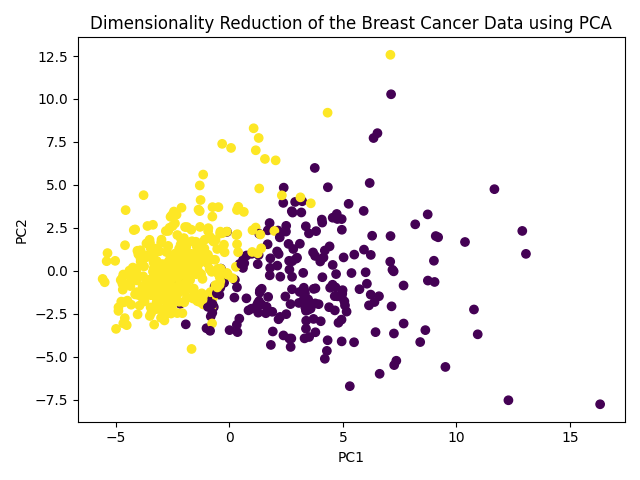

In [6]:
plt.figure()
plt.scatter(pca_data[:,0], pca_data[:,1],c=cancer['target'])
plt.title('Dimensionality Reduction of the Breast Cancer Data using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()

percent_var= np.round(pca.explained_variance_ratio_*100)
labels= ['PC{}'.format(i+1) for  i in range(0, len(percent_var))]
plt.figure()
x=[i for i in range(len(percent_var))]
plt.bar(x, percent_var, tick_label=labels)
plt.ylabel('Percentage of Variation')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

In [8]:
features=pd.DataFrame(pca.components_,columns=data.columns, index=labels)
features.T
#Each value here is indicative of the correlation that exists between the particular principal component and the feature in question 

,PC1,PC2,PC3,PC4,PC5
mean radius,0.218902,-0.233857,-0.008531,0.041409,0.037786
mean texture,0.103725,-0.059706,0.064550,-0.603050,-0.049469
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,0.037375
mean area,0.220995,-0.231077,0.028700,0.053434,0.010331
mean smoothness,0.142590,0.186113,-0.104292,0.159383,-0.365088
mean compactness,0.239285,0.151892,-0.074092,0.031795,0.011704
mean concavity,0.258400,0.060165,0.002734,0.019123,0.086375
mean concave points,0.260854,-0.034768,-0.025564,0.065336,-0.043861
mean symmetry,0.138167,0.190349,-0.040240,0.067125,-0.305941
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,-0.044424


Multi-Dimensional Scaling. Another form of Dimensionality Reduction that uses distance instead of variance for determining the clusters in the data

In [9]:
from sklearn.manifold import MDS, Isomap, TSNE
mds= MDS(n_components=5)
#Getting the MDS data set
mdsdata= mds.fit_transform(scaled)

c:\Users\Godfred King\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0.5, 1.0, 'Multi-Dimensional Scaling')

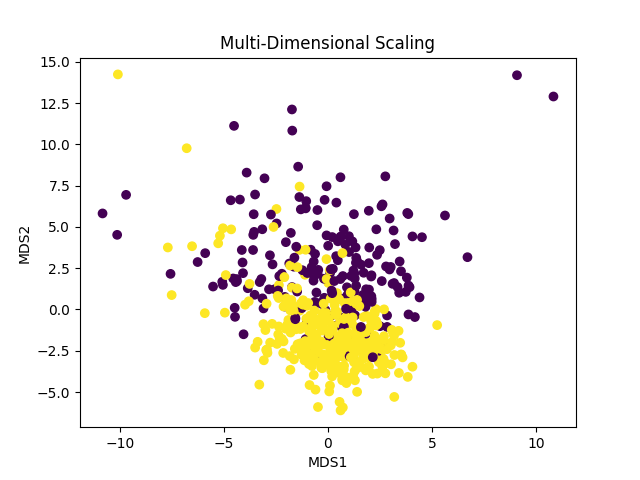

In [10]:
plt.figure()
plt.scatter(mdsdata[:,0], mdsdata[:,1], c=cancer['target'])
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('Multi-Dimensional Scaling')

T-Distributed Stochastic Neighbor Embedding


In [11]:
colors=['royalblue','deeppink','maroon','blue','mediumorchid','tan','forestgreen','olive','goldenrod','lightcyan','navy']
#Vectorizer is taking in a function that will return one of the colours in the colours list. In this case since we are using target values for each of the colours
# based on the target value, we will get different colours
vectorizer= np.vectorize(lambda x:colors[int(x)% len(colors)])

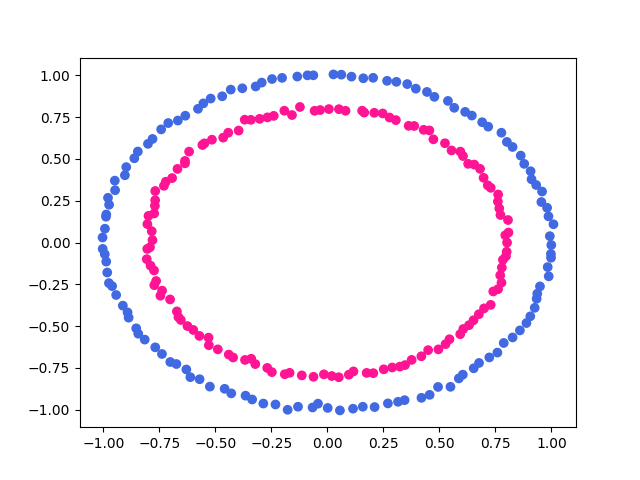

In [12]:
#t-SNE on makecircle data set
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=250, noise=0.01)
plt.figure()
plt.scatter(X[:,0],X[:,1], c=vectorizer(y))

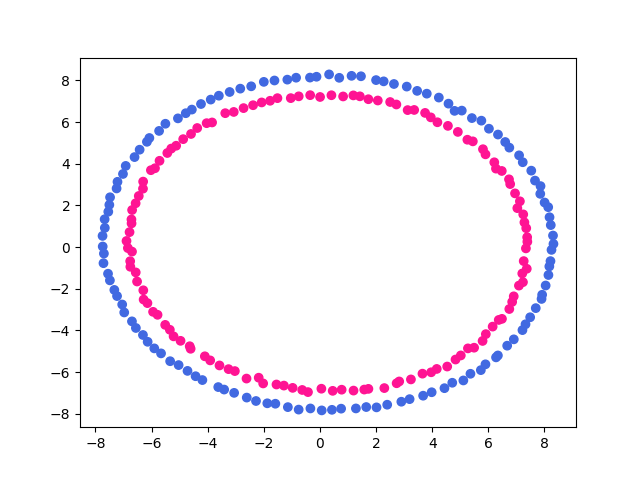

In [13]:
from sklearn.manifold import TSNE
tsne= TSNE(n_components=2, perplexity=40, init='random')# the init parameter is used to determine how you will initialize the HD data on the Low plot before starting out
tsnefit= tsne.fit_transform(X)
plt.figure()
plt.scatter(tsnefit[:,0],tsnefit[:,1], c=vectorizer(y))


In [14]:
#PCA and TSNE
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784',version=1)
X= mnist['data']
y= mnist['target']

c:\Users\Godfred King\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.95)

In [16]:
y_train


62433    2
23369    1
43340    7
30476    5
10999    2
        ..
25839    0
36752    8
42000    1
29699    2
9999     7
Name: class, Length: 3500, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [17]:
pca=PCA(n_components=2)
X_PCA= pca.fit_transform(X_train)

In [18]:
tsne= TSNE(n_components=2, perplexity=100, random_state=42)
X_100= tsne.fit_transform(X_train)

Text(0.5, 1.0, 't-SNE plot')

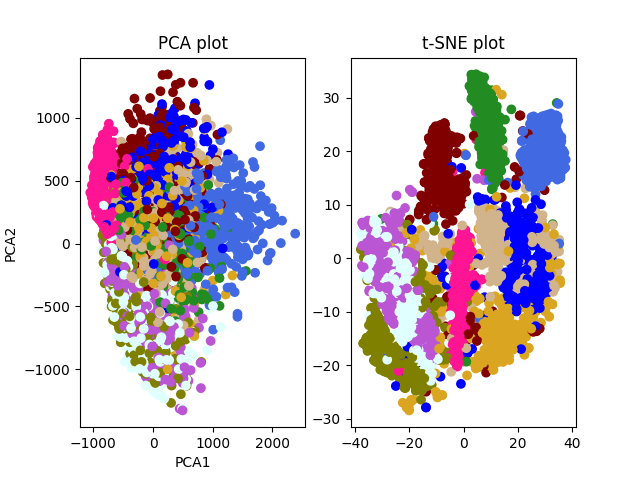

In [19]:
#Plotting the PCA and TSNE results
fig,(ax1,ax2)= plt.subplots(1,2)
ax1.scatter(X_PCA[:,0],X_PCA[:,1],c=vectorizer(y_train))
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_title('PCA plot')
ax2.scatter(X_100[:,0],X_100[:,1],c= vectorizer(y_train), label=y_train)
ax2.set_title('t-SNE plot')


Uniform Manifold Approximation- UMAP


In [20]:
from umap import umap_ as UMAP
mape= UMAP.UMAP(n_components=2, random_state=0)
umapvals=mape.fit_transform(X_train)


Text(0.5, 1.0, 'UMAP')

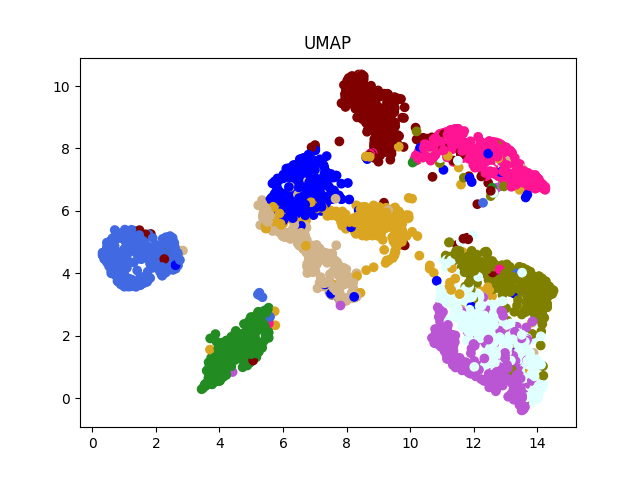

In [21]:
plt.figure()
plt.scatter(umapvals[:,0],umapvals[:,1], c= vectorizer(y_train))
plt.title('UMAP')

Linear Discriminate Analysis
With linear discriminate analysis, we are trying to determine the independent features that results in the highest seperation of the classes within the data
The number of components have to be the number of classes in the dataset -1

In [22]:
y_train.unique()

['2', '1', '7', '5', '6', '4', '3', '9', '8', '0']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

linearda= lda(n_components=9)
xtrain_lda=linearda.fit_transform(X_train, y_train)
xtest_lda= linearda.transform(X_test)
compvariance= np.round(linearda.explained_variance_ratio_*100)

Text(0.5, 1.0, 'Scree Plot')

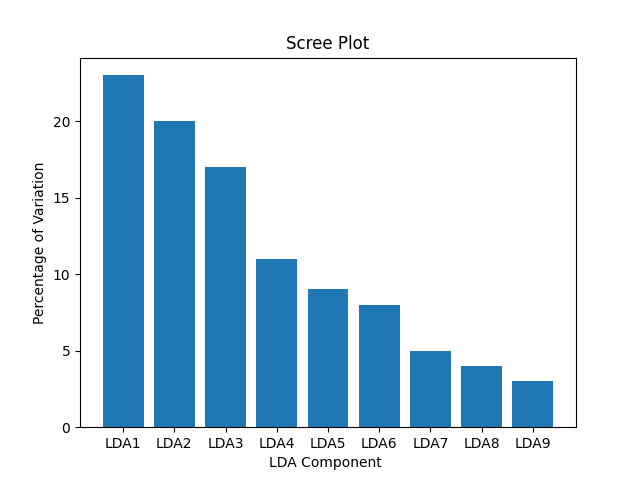

In [24]:
labels= ['LDA{}'.format(i+1) for  i in range(0, len(compvariance))]
plt.figure()
x=[i for i in range(len(compvariance))]
plt.bar(x, compvariance, tick_label=labels)
plt.ylabel('Percentage of Variation')
plt.xlabel('LDA Component ')
plt.title('Scree Plot')

Text(0.5, 1.0, 'LDA plot showing the two main Linear components')

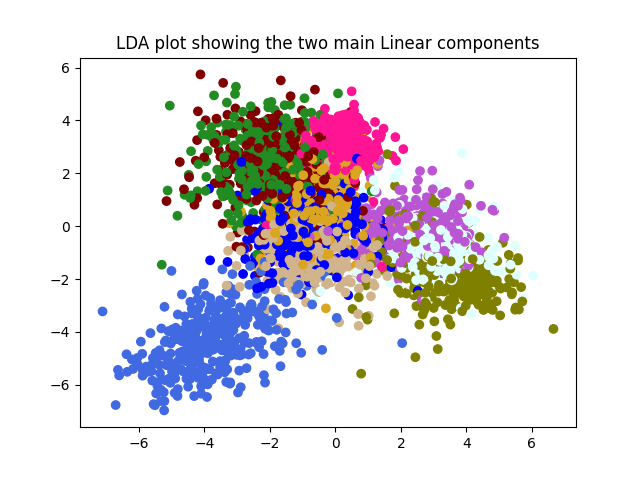

In [25]:
plt.figure()
plt.scatter(xtrain_lda[:,0], xtrain_lda[:,1] ,c= vectorizer(y_train))
plt.title('LDA plot showing the two main Linear components')


Hierarchical Clustering for heatmaps

In [26]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [27]:
len(data)
hierdata= data.loc[:,['mean radius', 'mean texture']]
hierdata=hierdata.rename( {'mean radius':0, 'mean texture':1}, axis=1)


Text(0, 0.5, 'Euclidean Distance')

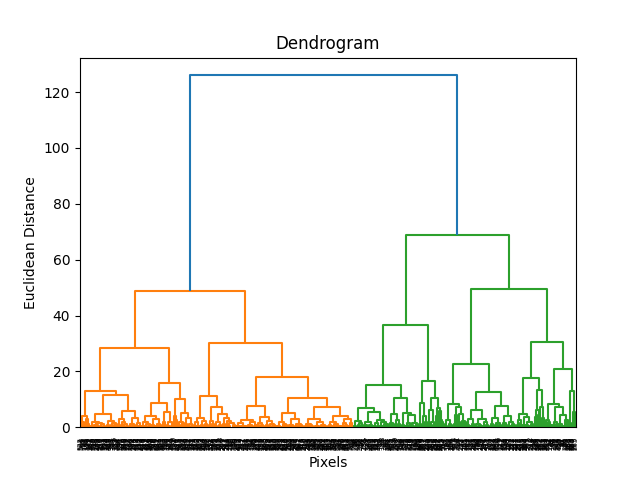

In [28]:
import scipy.cluster.hierarchy as sch

plt.figure()
dendrogram= sch.dendrogram(sch.linkage((hierdata), method='ward'))
plt.title('Dendrogram')
plt.xlabel('Pixels')
plt.ylabel('Euclidean Distance')
# The longest line without crossing any of the vertical lines becomes our number of clusters

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y_cluster= cluster.fit_predict(hierdata)# used to show which cluster a datapoint belongs to



c:\Users\Godfred King\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
hierdata.loc[y_cluster==0,1]


1      17.77
2      21.25
4      14.34
6      19.98
7      20.83
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: 1, Length: 255, dtype: float64

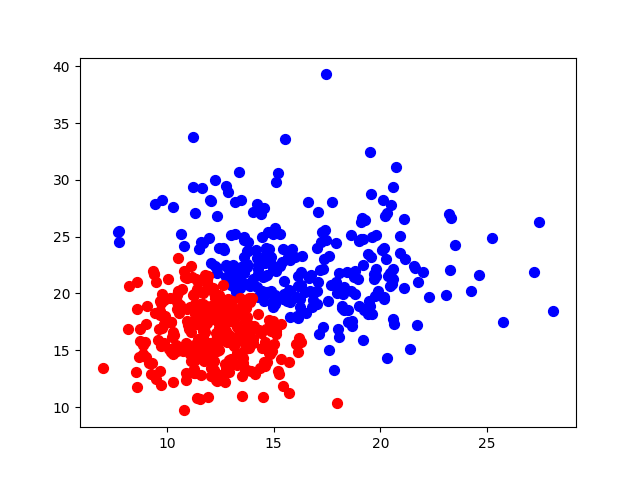

In [31]:
# We are going to plot two scatter plots on top of each other to see how the clusters are

plt.figure()
plt.scatter(hierdata.loc[y_cluster==0,0], hierdata.loc[y_cluster==0,1], s=50, c='blue')
plt.scatter(hierdata.loc[y_cluster==1,0], hierdata.loc[y_cluster==1,1], s=50, c='red')

K-Means Clustering

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
X= np.random.rand(50,2)
Y= 2+ np.random.rand(50,2)
Z= pd.DataFrame(np.concatenate((X,Y)))



,0,1
0,0.716730,0.044246
1,0.822795,0.696085
2,0.497963,0.730400
3,0.902603,0.075205
4,0.309206,0.914311
...,...,...
95,2.796367,2.346544
96,2.004503,2.026030
97,2.901385,2.957423
98,2.179589,2.534300


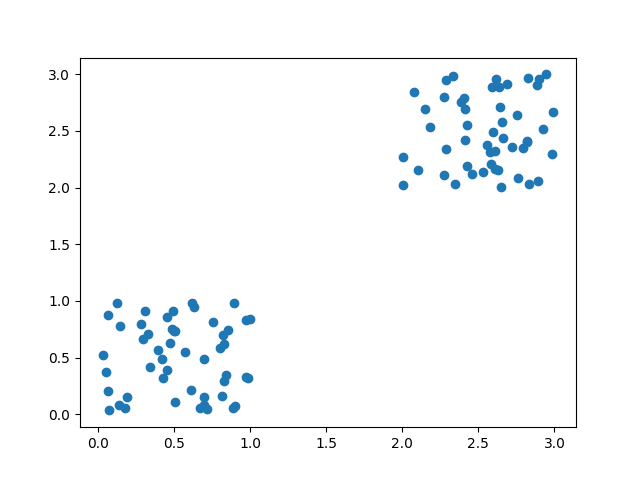

In [38]:
plt.figure()
plt.scatter(Z[0], Z[1])

The Silhouette score is used to determine the overall goodness of the fit to the various clusters. To show whether the different datapoints were assigned to the right clusters.

In [40]:
kmean= KMeans(n_clusters=2)
labels=kmean.fit_predict(Z)
print(f'This is the silhouette score for this KMeans {silhouette_score(Z, labels)}')


This is the silhouette score for this KMeans 0.8096750450268506


c:\Users\Godfred King\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

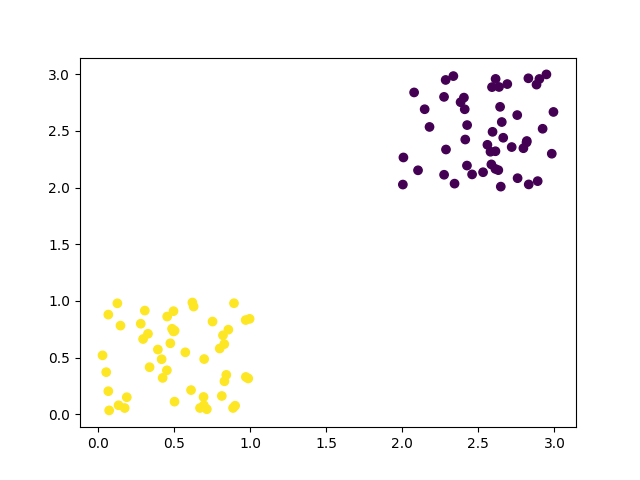

In [42]:
plt.figure()
plt.scatter(Z[0],Z[1], c=labels)

We are going to try to build an elbow plot to show the different clusters and the WCSS(Within Class Sum of Squares)

In [ ]:
wcss= []
for i in range(1,6):
    kmean= KMeans(n_clusters=i)
    kmean.fit_predict(Z)
    wcss.append(kmean.inertia_)

Text(0, 0.5, 'WCSS')

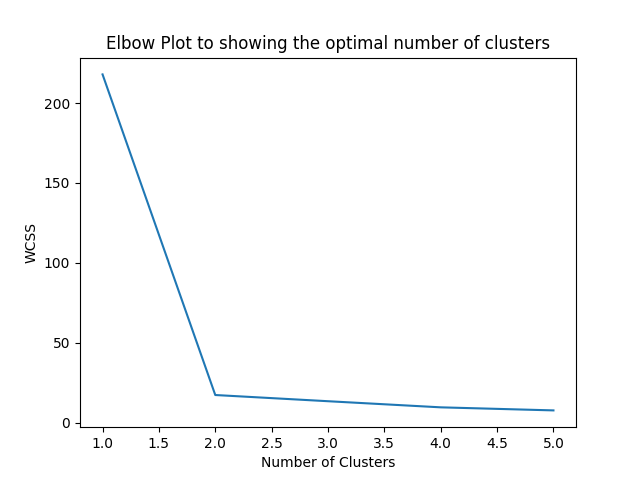

In [47]:
plt.figure()
plt.plot([i for i in range(1,6)], wcss)
plt.title('Elbow Plot to showing the optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

K-Nearest Neighbours for Machine Learning

In [68]:
from sklearn.datasets import load_iris
iris_data= load_iris()
df= pd.DataFrame(iris_data.data, columns=[iris_data.feature_names])
df['target']= pd.DataFrame(iris_data.target)


(target,)
0            50
1            50
2            50
dtype: int64

In [75]:
train= df.drop('target',axis=1)
X_train, X_test, y_train, y_test= train_test_split(train, df['target'],random_state=2)

C:\Users\Godfred King\AppData\Local\Temp\ipykernel_13568\4247386052.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  train= df.drop('target',axis=1)


In [76]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
53,5.5,2.3,4.0,1.3
141,6.9,3.1,5.1,2.3
78,6.0,2.9,4.5,1.5
97,6.2,2.9,4.3,1.3
143,6.8,3.2,5.9,2.3
...,...,...,...,...
75,6.6,3.0,4.4,1.4
43,5.0,3.5,1.6,0.6
22,4.6,3.6,1.0,0.2
72,6.3,2.5,4.9,1.5


In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score

#Trying to different number of neighbors
k_neighbors= range(1,26)
scores={}
scores_list=[]
for num in k_neighbors:
    knn= KNeighborsClassifier(n_neighbors=num, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    scores[num]= accuracy_score(y_pred, y_test)
    

C:\Users\Godfred King\AppData\Local\Temp\ipykernel_13568\3853240453.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Text(0.5, 1.0, 'Accuracy Score for Different Ks')

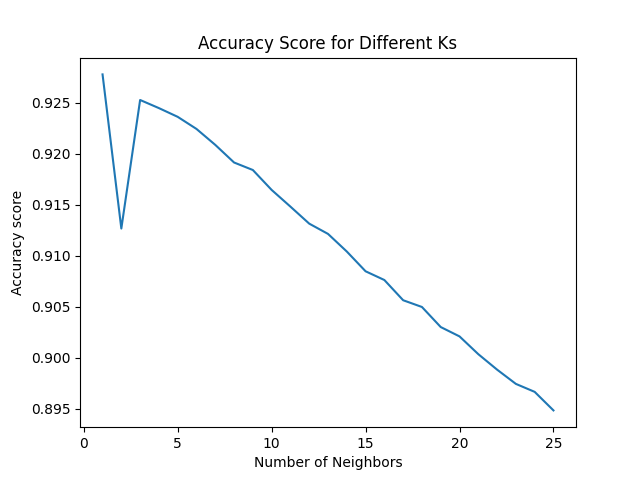

In [64]:
plt.figure()
xaxis=list(scores.keys())
yaxis=list(scores.values())
plt.plot(xaxis, yaxis)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy score')
plt.title('Accuracy Score for Different Ks')

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
62433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


DBSCAN 

In [88]:
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=1, min_samples=2)
labels= dbscan.fit_predict(X_train)
dbdata= X_train.copy()
dbdata['labels']= dbscan.labels_
dbdata['labels'].value_counts()

(labels,)
0            78
1            34
dtype: int64

In [89]:
print(f'This is the Silhouette score for the DBSCAN {silhouette_score(X_train,labels)}')

This is the Silhouette score for the DBSCAN 0.6756614603521286


Text(0, 0.5, 'petal width (cm)')

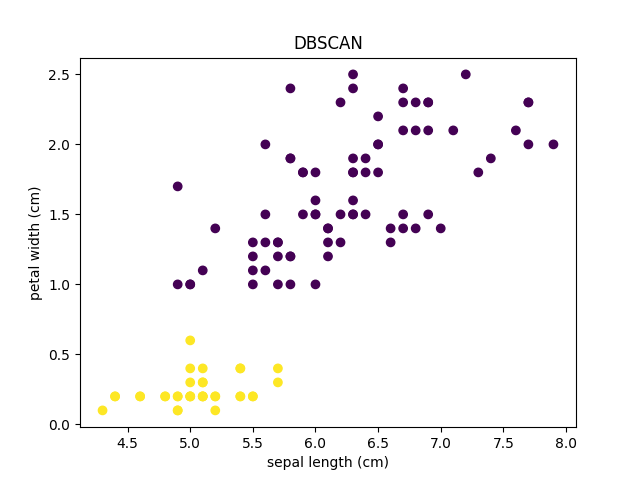

In [91]:
#Plotting a scatter plot with two of the variables
plt.figure()
plt.scatter(dbdata['sepal length (cm)'], dbdata['petal width (cm)'],c=labels)
plt.title('DBSCAN')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')